In [2]:
import pandas as pd
import requests

In [3]:
df = pd.read_csv('reports02022021.csv')

In [4]:
df = df.drop(columns=['description', 'abuse_type_other'])

In [5]:
df

,id,address,abuse_type_id,abuser,from_country,from_country_code,created_at
0,209319,1KNky3De36qfDAimJaTXru6LoFUftg7kpC,5,TFHCYY81@ARORA.COM.IN,Uruguay,UY,2021-01-01T00:20:33.000000Z
1,209320,1Nd3JST1daeyzmPovkRoemjysA6JfXjVRg,4,steve.holmes@capellabioscience.com,United States,US,2021-01-01T00:53:38.000000Z
2,209321,1HqsQFJebHVyEgEsjXGcGVgebaXbayTU8P,4,administration@lovesexbody.com,Russia,RU,2021-01-01T01:06:00.000000Z
3,209322,1J87Q9qS4mwEH2S1pK4MuGm7PrcpSwNGMM,4,mail@bikekingco.com,Russia,RU,2021-01-01T01:07:24.000000Z
4,209323,1BN1tfVf9z5UYmNCwBhpRX31GVdqpNSiU3,1,Ghgf,India,IN,2021-01-01T02:03:37.000000Z
...,...,...,...,...,...,...,...
5212,214532,17T8PE5CHFUvkBPM7FVsgZKDDxevzindfL,99,musk2.top,Russia,RU,2021-01-31T03:14:43.000000Z
5213,214533,17LZreCYBa7ikp86xSTrxsvRaAVvEvfvdV,4,Joe James,Spain,ES,2021-01-31T03:16:18.000000Z
5214,214534,1NqRYEwwvQdMT6cz46EBS2hb47HPJ3f8FF,4,Joe James,Spain,ES,2021-01-31T03:17:01.000000Z
5215,214535,1D6QyV5oENzt4e8D3iPqsu4RbeQvsHMyc6,4,noreply@find-freelancer.com,Canada,CA,2021-01-31T03:22:31.000000Z


In [6]:
df.address.unique

<bound method Series.unique of 0       1KNky3De36qfDAimJaTXru6LoFUftg7kpC
1       1Nd3JST1daeyzmPovkRoemjysA6JfXjVRg
2       1HqsQFJebHVyEgEsjXGcGVgebaXbayTU8P
3       1J87Q9qS4mwEH2S1pK4MuGm7PrcpSwNGMM
4       1BN1tfVf9z5UYmNCwBhpRX31GVdqpNSiU3
                       ...                
5212    17T8PE5CHFUvkBPM7FVsgZKDDxevzindfL
5213    17LZreCYBa7ikp86xSTrxsvRaAVvEvfvdV
5214    1NqRYEwwvQdMT6cz46EBS2hb47HPJ3f8FF
5215    1D6QyV5oENzt4e8D3iPqsu4RbeQvsHMyc6
5216    1Kri3MbNKgyfN48Qfna9CDDskdDAunZQt6
Name: address, Length: 5217, dtype: object>

In [7]:
df['address'].iloc[4]

'1BN1tfVf9z5UYmNCwBhpRX31GVdqpNSiU3'

In [8]:
address = df['address'].iloc[4]
url = f'https://www.bitcoinabuse.com/api/reports/check?address={address}&api_token=yORfu5EWY3bluf28BC2FoSt0r5niORodc9L2EnsXM4JDlRI1PHKZ1ejiMDaI'
r = requests.get(url)

In [9]:
r.json()

{'address': '1BN1tfVf9z5UYmNCwBhpRX31GVdqpNSiU3', 'count': 2}

In [10]:
url = f'https://blockchain.info/rawaddr/{address}'
url

'https://blockchain.info/rawaddr/1BN1tfVf9z5UYmNCwBhpRX31GVdqpNSiU3'

In [11]:
url = f'https://blockchain.info/rawaddr/{address}'
r = requests.get(url)
r.json()['txs']

[{'ver': 1,
  'inputs': [{'sequence': 4294967295,
    'witness': '',
    'prev_out': {'spent': True,
     'spending_outpoints': [{'tx_index': 0, 'n': 0}],
     'tx_index': 0,
     'type': 0,
     'addr': '145kQfMU4SwzQ62WaAggC23xPvY2muXkUB',
     'value': 858909,
     'n': 0,
     'script': '76a91421ce46bdbbed92c26d905b3d6f9e4363c6f290d288ac'},
    'script': '483045022100d7aa305f0af7a5dd2b171c9e76ebccb8abedf8879c432b0b14a6dadf52d5e4790220482af5b41d19a8eabfc85cc0afac74d8fbffe504a8d7cafbe495258ceabb111b012103f879d7959c32238e3cb4593c601e17f6a8c9c1809df9c552e2ddf918b099319e'}],
  'weight': 904,
  'block_height': 668774,
  'relayed_by': '0.0.0.0',
  'out': [{'spent': False,
    'tx_index': 0,
    'type': 0,
    'addr': '1BN1tfVf9z5UYmNCwBhpRX31GVdqpNSiU3',
    'value': 143950,
    'n': 0,
    'script': '76a91471aabc91bc8063da0f92b694f2983d9d432c653088ac'},
   {'spent': False,
    'tx_index': 0,
    'type': 0,
    'addr': '1BFPWQXqFwFNvHNDdbV1UPf6BMKrCgNgPY',
    'value': 691351,
    'n': 1,

In [28]:
url2 = f'https://blockchain.info/rawaddr/{address}?offset=49'
r2 = requests.get(url2)
txs = r2.json()['txs']
len(txs)

50

In [29]:
txs

[{'ver': 1,
  'inputs': [{'sequence': 4294967295,
    'witness': '',
    'prev_out': {'spent': True,
     'spending_outpoints': [{'tx_index': 0, 'n': 0}],
     'tx_index': 0,
     'type': 0,
     'addr': '1EGjdqxrTffxker93txm5dc6n9SXEJYcYw',
     'value': 15005451,
     'n': 1,
     'script': '76a914919376f8464fb44850a223c1f95a3439df67338888ac'},
    'script': '47304402207fd1853322d0517fa39667cd61d87fe44e563732096865524b89f65332da93800220368a21801ab1f6526e0d1219475322eb826c75b1e2f786f6c4ccbef251367e8e012102a6f0c767f13e38bfa7e9d827d066dfbdf04993d6e1d20c9ac2dfc3981c90b046'}],
  'weight': 900,
  'block_height': 639712,
  'relayed_by': '0.0.0.0',
  'out': [{'spent': True,
    'spending_outpoints': [{'tx_index': 0, 'n': 68}],
    'tx_index': 0,
    'type': 0,
    'addr': '1BN1tfVf9z5UYmNCwBhpRX31GVdqpNSiU3',
    'value': 600000,
    'n': 0,
    'script': '76a91471aabc91bc8063da0f92b694f2983d9d432c653088ac'},
   {'spent': True,
    'spending_outpoints': [{'tx_index': 0, 'n': 0}],
    'tx_ind

In [12]:
transactions = r.json()['txs']

In [14]:
transactions[1].keys()

dict_keys(['ver', 'inputs', 'weight', 'block_height', 'relayed_by', 'out', 'lock_time', 'result', 'size', 'block_index', 'time', 'tx_index', 'vin_sz', 'hash', 'vout_sz'])

In [15]:
transactions[0]['inputs'][0]['prev_out']['addr']

'145kQfMU4SwzQ62WaAggC23xPvY2muXkUB'

In [16]:
transactions[0]['out'][0]['addr']

'1BN1tfVf9z5UYmNCwBhpRX31GVdqpNSiU3'

In [17]:
transactions[0]['out'][1]['addr']

'1BFPWQXqFwFNvHNDdbV1UPf6BMKrCgNgPY'

In [60]:
from graphviz import Digraph

In [61]:
dot = Digraph()

In [62]:
t1 = transactions[0]['inputs'][0]['prev_out']['addr']
t2 = transactions[0]['out'][1]['addr']

In [64]:
dot.node('AA', t1[:3] + "..." + t1[-3:])
dot.node('AB', address[:3] + "..." + address[-3:], color='red')
dot.node('AC', t2[:3] + "..." + t2[-3:])
dot.edge('AA', 'AB')
dot.edge('AA', 'AC')

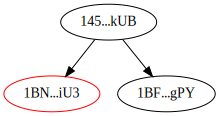

In [65]:
dot

In [45]:
transactions[1]['out']

[{'spent': True,
  'spending_outpoints': [{'tx_index': 0, 'n': 0}],
  'tx_index': 0,
  'type': 0,
  'value': 392519493,
  'n': 0,
  'script': '001454835a591394a8a4a95cf900d1a8e2b369ed14a9'},
 {'spent': True,
  'spending_outpoints': [{'tx_index': 0, 'n': 716}],
  'tx_index': 0,
  'type': 0,
  'addr': '39uAm8Umr2YysUtTCoF2NTPZ3RUSWksDiL',
  'value': 172000,
  'n': 1,
  'script': 'a9145a0d60096987b6278ada57f3ed4d545715c43cf287'},
 {'spent': True,
  'spending_outpoints': [{'tx_index': 0, 'n': 6}],
  'tx_index': 0,
  'type': 0,
  'addr': '19q9cs2zrsFcq1dnjSccWnQBfnVFXvaszA',
  'value': 38577000,
  'n': 2,
  'script': '76a91460dc2aa97f4d569fc7c3dbe185d56f9e5bb5985c88ac'},
 {'spent': True,
  'spending_outpoints': [{'tx_index': 0, 'n': 40}],
  'tx_index': 0,
  'type': 0,
  'addr': '3NSzujTqpk6FSeDWqmy9nSWMa82NafpxPm',
  'value': 305157,
  'n': 3,
  'script': 'a914e3b3f8b898322b87b719170563f8ef561114004f87'},
 {'spent': True,
  'spending_outpoints': [{'tx_index': 0, 'n': 394}],
  'tx_index': 0,

In [81]:
addresses = []
dots = []
for tx in range(len(transactions)):
    dot = Digraph()
    dot.node('AB', address[:3] + "..." + address[-3:], color='red')
    for out in range(len(transactions[tx]['out'])):
        try:
            a = transactions[tx]['out'][out]['addr']
            addresses.append(a)
            dot.node(a, a[:3] + "..." + a[-3:])
            dot.edge('AB', a)
        except:
            print(f'Fehler bei {tx} {out}')
            continue
    dots.append(dot)

Fehler bei 1 0
Fehler bei 1 32
Fehler bei 1 52
Fehler bei 1 64
Fehler bei 1 92
Fehler bei 2 19
Fehler bei 2 33
Fehler bei 6 2
Fehler bei 13 2
Fehler bei 13 6
Fehler bei 16 51
Fehler bei 17 1
Fehler bei 18 34
Fehler bei 24 8
Fehler bei 24 13
Fehler bei 24 20
Fehler bei 31 8
Fehler bei 31 30


In [82]:
len(dots)

50

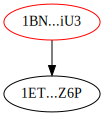

In [86]:
dots[3]

In [49]:
df_wallets = pd.read_csv('pblv2021/addresses.csv')

In [50]:
df_wallets

,wallet,page,address,balance,transactions,last_used_in_block
0,Poloniex.com,1,12cgpFdJViXbwHbhrA3TuW1EGnL25Zqc3P,1824.185042,63500,668636
1,Poloniex.com,1,17A16QmavnUfCW11DAApiJxp7ARnxN5pGX,318.319762,17510,668644
2,Poloniex.com,1,1GjF4VejdJ2n5eS6WPG2aNU7m5ygyqgmDc,4.777640,4225,668594
3,Poloniex.com,1,1NYH8TchsaVv4qv1pZcaHbHYjgTvtkjb8M,4.516187,14204,668643
4,Poloniex.com,1,1LTBCyh9dKhNNZFaByPXfrkeuAD7yr6A4b,3.083592,24359,465505
...,...,...,...,...,...,...
7095,BtcTrade.com,1,18iK2CwMNKV6JW7GpnsHwgz3L86YCFNxHk,0.000000,955,537641
7096,BtcTrade.com,1,1HfVq9Gf2CpXwmTKamyAqVGwp5ADDTix7J,0.000000,952,537645
7097,BtcTrade.com,1,1FURSaicwaWLKgpHBc4z7quC7mJHkKG8nY,0.000000,948,537645
7098,BtcTrade.com,1,19samgSqg8ZZeQK4rXgJf7yixPr6C81i41,0.000000,944,537645


In [58]:
len(set(addresses))

392

In [51]:
df_wallets.address.values

array(['12cgpFdJViXbwHbhrA3TuW1EGnL25Zqc3P',
       '17A16QmavnUfCW11DAApiJxp7ARnxN5pGX',
       '1GjF4VejdJ2n5eS6WPG2aNU7m5ygyqgmDc', ...,
       '1FURSaicwaWLKgpHBc4z7quC7mJHkKG8nY',
       '19samgSqg8ZZeQK4rXgJf7yixPr6C81i41',
       '1AnuxwdKGL2rm2ujHbRHDY5kGAnzcJzCiv'], dtype=object)

In [52]:
for addr in addresses:
    if addr in df_wallets.address.values:
        print("Hallo")

In [92]:
transactions[1]['inputs'][0]['prev_out']

{'spent': True,
 'spending_outpoints': [{'tx_index': 0, 'n': 0}],
 'tx_index': 0,
 'type': 0,
 'value': 599141050,
 'n': 0,
 'script': '00146433781913e15716c4b2480005e9af677e1c767e'}

In [13]:
for i in range(1, len(transactions[2]['out'])):
    if transactions[2]['out'][i]['addr'] == address:
        print(f'Gefunden bei {i}')

Gefunden bei 15


KeyError: 'addr'